In [8]:
# import libraries
import pandas as pd
import spacy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tomotopy as tp


In [9]:
# import data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.head()

,helpfulness_cat,imdb_user_review
0,1.0,It is hard to find such delightful and adorabl...
1,1.0,"They don't make films like this faded, hauntin..."
2,1.0,I first viewed this movie in 1924 at age 6 yrs...
3,1.0,I doubt that I'd ever seen anything resembling...
4,1.0,I was shocked to find myself riveted to this m...


In [4]:
print(sum(train['helpfulness_cat'])/len(train))


0.7637377963737796


In [5]:
document_lengths = np.array(list(map(len, train['imdb_user_review'].str.split(' '))))

print("The average number of words in a document is: {}.".format(np.mean(document_lengths)))
print("The minimum number of words in a document is: {}.".format(min(document_lengths)))
print("The maximum number of words in a document is: {}.".format(max(document_lengths)))

The average number of words in a document is: 175.48888888888888.
The minimum number of words in a document is: 6.
The maximum number of words in a document is: 3954.


/home/ash/miniconda3/envs/nlp/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribution of number of words'}, xlabel='Number of words', ylabel='Density'>

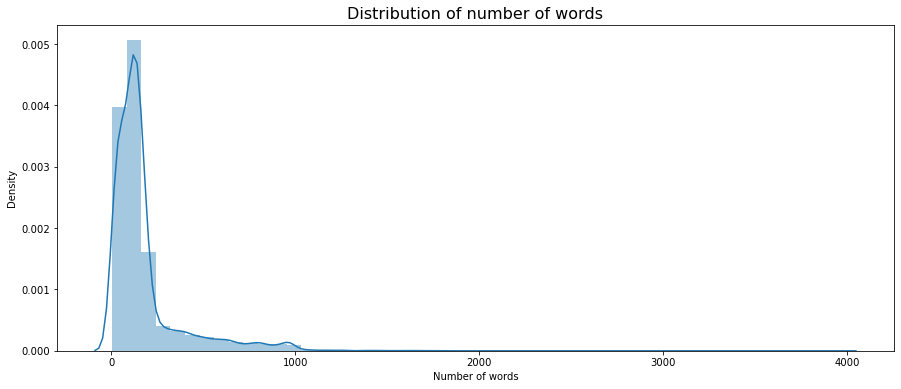

In [6]:
fig, ax = plt.subplots(figsize=(15,6))

ax.set_title("Distribution of number of words", fontsize=16)
ax.set_xlabel("Number of words")
sns.distplot(document_lengths, bins=50, ax=ax)

In [7]:
print("There are {} documents with over 1500 words.".format(sum(document_lengths > 1500)))
print("There are {} documents with max 6 words.".format(sum(document_lengths <= 6)))

There are 9 documents with over 1500 words.
There are 2 documents with max 6 words.


### Basic Data Cleansing

In [10]:
import re

In [32]:
# data sample
train['imdb_user_review'][0]

'It is hard to find such delightful and adorable movies these days as \\"The Kid\\". It is a silent movie but so rich, winning and beautiful that you don\\u00b4t nead words. Chaplin and 6-year old Coogan are possibly the most charming pair I have ever seen in my life. The film succees to be nicely light and full of joy but also overwhelmingly sad and sentimental. I always get my eyes full with tears of saddness and happiness. And I really never cry in movies. And the music...its simply Oscar-level! The movie is sympathetic, full of feeling, touchingly funny moments. It is truly a masterpiece showing how extraordinary talented person Charlie Chaplin was considering this film is respectively over 80 years old! So don\\u00b4t you miss it because of it\\u00b4s age, don\\u00b4t miss it.'

In [11]:
def basic_clean(text):
    """
    Remove \\,\n,\t,... from text
    Remove whitespace from text
    change to lowercase
    """
    
    # Replacing all the occurrences of \n,\\n,\t,\\ with a space.
    Formatted_text = text.replace('\\n', ' ').replace('\n', ' ').replace('\t',' ').replace('\'', ' ').replace('"',' ')
    pattern = re.compile(r'\s+')
    Formatted_text = Formatted_text.lower()
    Formatted_text = Formatted_text.replace('\\u00b4',' ').replace('\\',' ')
    Without_whitespace = re.sub(pattern, ' ', Formatted_text)
    Formatted_text = Without_whitespace.replace('?', ' ? ').replace(')', ') ')
    return Formatted_text

In [12]:
# cleaning data
train['imdb_user_review'] = train['imdb_user_review'].apply(basic_clean)
train['imdb_user_review'][0]

'it is hard to find such delightful and adorable movies these days as the kid . it is a silent movie but so rich, winning and beautiful that you don t nead words. chaplin and 6-year old coogan are possibly the most charming pair i have ever seen in my life. the film succees to be nicely light and full of joy but also overwhelmingly sad and sentimental. i always get my eyes full with tears of saddness and happiness. and i really never cry in movies. and the music...its simply oscar-level! the movie is sympathetic, full of feeling, touchingly funny moments. it is truly a masterpiece showing how extraordinary talented person charlie chaplin was considering this film is respectively over 80 years old! so don t you miss it because of it s age, don t miss it.'

Sentiment Analysis

In [46]:
# install transformers
#!pip install -q transformers

In [149]:
# # using fine tuned bertmodel based on tweet dataset to analyse sentiment
# from transformers import pipeline
 
# # Set up the inference pipeline using a model from the 🤗 Hub
# sentiment_analysis = pipeline(model="finiteautomata/bertweet-base-sentiment-analysis")

Downloading:   0%|          | 0.00/1.13k [00:00<?, ?B/s]

emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0


In [150]:
# # update sentiment analysis model config
# sentiment_analysis.model.config.update({"max_position_embeddings":1000,"max_seq_length":512})

In [ ]:
# from transformers import pipeline
 
# # Set up the inference pipeline using a model from the 🤗 Hub
# sentiment_analysis = pipeline(model="finiteautomata/bertweet-base-sentiment-analysis")
 
# # Let's run the sentiment analysis on each tweet
# sentiment = []
# for review in train['imdb_user_review']:
#    try:
#      content = [review]
#      sentiment = sentiment_analysis(content)
#      review.append({'tweet': content, 'sentiment': sentiment[0]['label']})
 
#    except:
#      pass

In [ ]:
'''
index error: 
Token indices sequence length is longer than the specified maximum sequence length for this model (176 > 128)
Due to the length of reviews, the model cannot handle them.
'''

In [13]:
# using roberta-large-mnli model to analyse sentiment
from transformers import pipeline
pipe = pipeline(model="roberta-large-mnli",return_all_scores=True)

Downloading:   0%|          | 0.00/1.02k [00:00<?, ?B/s]

Some weights of the model checkpoint at roberta-large-mnli were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [14]:
# split the data into 5 data sets
train_1 = train[:int(len(train)*0.2)]
train_2 = train[int(len(train)*0.2):int(len(train)*0.4)]
train_3 = train[int(len(train)*0.4):int(len(train)*0.6)]
train_4 = train[int(len(train)*0.6):int(len(train)*0.8)]
train_5 = train[int(len(train)*0.8):]

In [25]:
CONTRADICTION = []
NEUTRAL = []
ENTAILMENT = []

for review in train['imdb_user_review']:
   try:
    temp = 0
    temp = pipe(review)[0][0]['score']
    CONTRADICTION.append(temp)

    temp = pipe(review)[0][1]['score']
    NEUTRAL.append(temp)

    temp = pipe(review)[0][2]['score']
    ENTAILMENT.append(temp)
   except:
     temp = 0
     CONTRADICTION.append(temp)
     NEUTRAL.append(temp)
     ENTAILMENT.append(temp)

In [26]:
# combine contradiction, neutral and entailment into a data frame
train_sentiment = pd.DataFrame({'CONTRADICTION': CONTRADICTION, 'NEUTRAL': NEUTRAL, 'ENTAILMENT': ENTAILMENT})
train_sentiment.to_csv('train_sentiment.csv', index=False)


In [31]:
# export data to csv
train_sentiment.to_csv('train_sentiment.csv', index=False)

In [117]:
# using nltk vader to carry out sentiment analysis
import nltk
nltk.download("vader_lexicon")
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/ash/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [133]:
# create a function to calculate the sentiment score
sent_analyzer = SentimentIntensityAnalyzer()
def sentiment_score(text):
    score = sent_analyzer.polarity_scores(text)
    score.pop('compound')
    return score

In [141]:
# calculate the sentiment score for each review and create neg, neu and pos columns
train['neg'] = train['imdb_user_review'].apply(sentiment_score).apply(lambda x: x['neg'])
train['neu'] = train['imdb_user_review'].apply(sentiment_score).apply(lambda x: x['neu'])
train['pos'] = train['imdb_user_review'].apply(sentiment_score).apply(lambda x: x['pos'])
train.head()


,helpfulness_cat,imdb_user_review,neg,neu,pos
0,1.0,it is hard to find such delightful and adorabl...,0.072,0.540,0.387
1,1.0,"they don t make films like this faded, hauntin...",0.081,0.854,0.065
2,1.0,i first viewed this movie in 1924 at age 6 yrs...,0.045,0.749,0.206
3,1.0,i doubt that i d ever seen anything resembling...,0.116,0.748,0.135
4,1.0,i was shocked to find myself riveted to this m...,0.058,0.797,0.145


/home/ash/miniconda3/envs/nlp/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ash/miniconda3/envs/nlp/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ash/miniconda3/envs/nlp/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with si

Text(0.5, 0, 'Sentiment score')

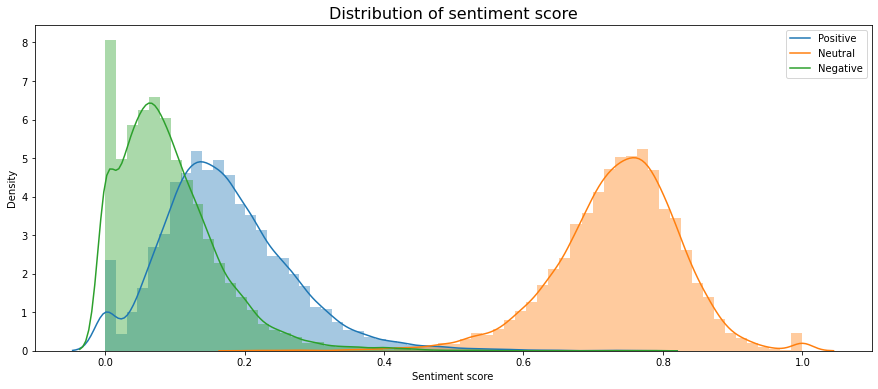

In [146]:
# plot the distribution for each sentiment score based on helpfulness_cat
fig, ax = plt.subplots(figsize=(15,6))
ax.set_title("Distribution of sentiment score", fontsize=16)
sns.distplot(train['pos'][train['helpfulness_cat'] == 1], bins=50, ax=ax)
sns.distplot(train['neu'][train['helpfulness_cat'] == 1], bins=50, ax=ax)
sns.distplot(train['neg'][train['helpfulness_cat'] == 1], bins=50, ax=ax)
# plot legend
ax.legend(['Positive', 'Neutral', 'Negative'])
ax.set_xlabel("Sentiment score")


/home/ash/miniconda3/envs/nlp/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ash/miniconda3/envs/nlp/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ash/miniconda3/envs/nlp/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with si

Text(0.5, 0, 'Sentiment score')

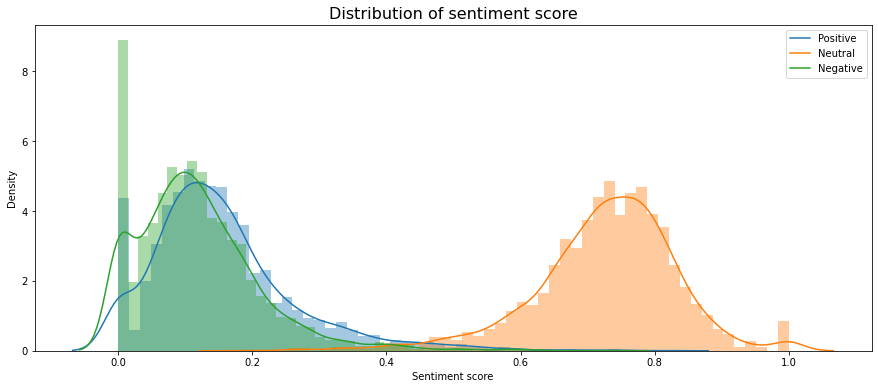

In [147]:
# plot the distribution for each sentiment score based on helpfulness_cat
fig, ax = plt.subplots(figsize=(15,6))
ax.set_title("Distribution of sentiment score", fontsize=16)
sns.distplot(train['pos'][train['helpfulness_cat'] == 0], bins=50, ax=ax)
sns.distplot(train['neu'][train['helpfulness_cat'] == 0], bins=50, ax=ax)
sns.distplot(train['neg'][train['helpfulness_cat'] == 0], bins=50, ax=ax)
# plot legend
ax.legend(['Positive', 'Neutral', 'Negative'])
ax.set_xlabel("Sentiment score")

LDA

In [28]:
# create a small sample of the training data
train = train[:100]
train

,helpfulness_cat,imdb_user_review
0,1.0,It is hard to find such delightful and adorabl...
1,1.0,"They don't make films like this faded, hauntin..."
2,1.0,I first viewed this movie in 1924 at age 6 yrs...
3,1.0,I doubt that I'd ever seen anything resembling...
4,1.0,I was shocked to find myself riveted to this m...
...,...,...
95,1.0,I don't know why this movie always hooks me th...
96,1.0,What a genius Joseph L Manckiewicz was. A lite...
97,1.0,When I first saw this movie I didn't think I w...
98,1.0,Bogart stretches his acting muscles and allows...


In [30]:
# LDA
nlp = spacy.load("en_core_web_sm")
docs_tokens, tmp_tokens = [], []
for item in train.loc[:, "imdb_user_review"].to_list():
    tmp_tokens = [
        token.lemma_
        for token in nlp(item)
        if not token.is_stop and not token.is_punct and not token.like_num
    ]
    docs_tokens.append(tmp_tokens)
    tmp_tokens = []

In [33]:
docs_tokens

[['hard',
  'find',
  'delightful',
  'adorable',
  'movie',
  'day',
  '\\"The',
  'Kid\\',
  'silent',
  'movie',
  'rich',
  'win',
  'beautiful',
  'don\\u00b4',
  't',
  'nead',
  'word',
  'Chaplin',
  'year',
  'old',
  'Coogan',
  'possibly',
  'charming',
  'pair',
  'see',
  'life',
  'film',
  'succee',
  'nicely',
  'light',
  'joy',
  'overwhelmingly',
  'sad',
  'sentimental',
  'eye',
  'tear',
  'saddness',
  'happiness',
  'cry',
  'movie',
  'music',
  'simply',
  'oscar',
  'level',
  'movie',
  'sympathetic',
  'feeling',
  'touchingly',
  'funny',
  'moment',
  'truly',
  'masterpiece',
  'show',
  'extraordinary',
  'talented',
  'person',
  'Charlie',
  'Chaplin',
  'consider',
  'film',
  'respectively',
  'year',
  'old',
  'don\\u00b4',
  't',
  'miss',
  'it\\u00b4',
  'age',
  'don\\u00b4',
  't',
  'miss'],
 ['film',
  'like',
  'fade',
  'haunt',
  'masterpiece',
  'silent',
  'cinema',
  'anymore',
  'Dracula',
  'sale',
  'movie',
  'right',
  'man',
  '